## Network Analysis
---

Identification and analysis of the Twitter networks in Erie PA during February 2019.

After collecting tweets from the Twitter stream for one week, they were filtered by location to about 375 tweets with unique 154 users in the Erie area. This dataset is used to examine the relationships among users of social media within a geographic area to compare the in-person social networks to virtual ones. 

Each user, friend, follower recieves an influence score that is determined by weighing the users's property value. So influence score = followers_count * .025 + listed_count * .075. This is used as way of estimating how much reach a user's tweet will have within Twitter. So a brand new user with no followers and not appearing on any list would have a score of 0.



In [15]:
%run -i '../scripts/networking.py'
%run -i '../scripts/config.py'

In [9]:
df = ReadCSV('erie_tweets_c1.csv')
df = df.sort_values(by=['influence_score'],ascending=False)
df.head()

,id_str,text,created_hr,created_dotw,calltime,day,set,call,favorite_count,retweet_count,...,profile_background_color,profile_text_color,user_screen_name,statuses_count,verified,num_tags,num_media,num_symbols,num_urls,num_user_mentions
5351,1096922040559386626,Your @MarshaMarsh Starters of the Game:\n\nSel...,18,Sat,2019-02-16 19:00:31.011348,16,6,1,0,0,...,A50909,EDC40C,ErieOtters,30832,True,0,0,0,0,1
6077,1097248979346165760,That'll do it for the First Period. We trail ...,16,Sun,2019-02-17 16:42:43.865082,17,5,1,0,0,...,A50909,EDC40C,ErieOtters,30867,True,0,0,0,0,0
5978,1097247218724192257,Evan Bouchard scores and its 4-0 London.\n\n5:...,16,Sun,2019-02-17 16:42:43.865082,17,5,1,0,0,...,A50909,EDC40C,ErieOtters,30865,True,0,0,0,0,0
6065,1097248723242020865,Gerard Keane is called for Holding and we will...,16,Sun,2019-02-17 16:42:43.865082,17,5,1,0,0,...,A50909,EDC40C,ErieOtters,30866,True,0,0,0,0,1
6239,1097282580183961600,"Otters Find Scoring Too Late, Fall 8-5 to Lond...",18,Sun,2019-02-17 18:53:59.653048,17,6,1,0,0,...,A50909,EDC40C,ErieOtters,30894,True,0,1,0,1,0


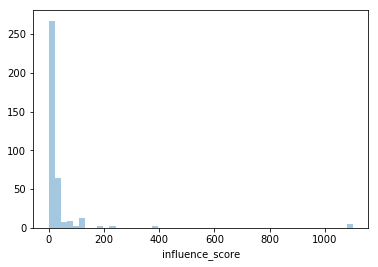

In [13]:
'''
Looking at the distibution of influence scores among Erie Twitter users and we can see an outlier in the data. 
From experience, I know this is likely a media personality with an outsized score.
'''

ax = sns.distplot(df['influence_score'],kde=False)

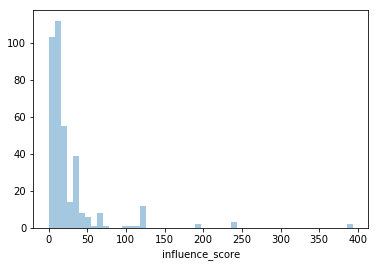

In [14]:
'''
After removing outliers, we have a much smoother distribution with several interesting data points to look at.
'''

outliers = df['influence_score'].mean()+ df['influence_score'].std()*3.5

df = df[df['influence_score'] < outliers]

ax = sns.distplot(df['influence_score'],kde=False)

In [16]:
np.mean(df['influence_score'])

25.91131436314363

In [11]:
'''
Get list of unique users.

Query user, follower, and friend info for the top 25 users. Save to files.
Hitting limit on users with many followers. Run individually.
'''

users = list(df['user_id_str'].unique())

user = users[25]

# GetUser(user)
# GetFollowers(user)
# GetFriends(user)

In [5]:
'''
Load graph with nodes for each user/friend/follower.
'''

G = LoadGraph()

Graph Density
--------------------------------------------
Number of Nodes :	 180
Number of Edges :	 322
Graph Density :	 	 0.009993792675356921


Score Comparison
DC 	 BC 	 CC 	 Score 	 Name  	 	 
--------------------------------------------
0.00 	 0.00 	 0.00 	 70.53   PEPHockey
0.00 	 0.00 	 0.00 	 193.68   lindapezzino
0.09 	 0.02 	 0.16 	 106.68   HurstMensHockey
0.13 	 0.03 	 0.12 	 38.43   DiandreJr
0.06 	 0.00 	 0.13 	 34.55   mcdgamedaycrew
0.10 	 0.04 	 0.12 	 33.15   tspaulding815
0.17 	 0.08 	 0.15 	 42.40   LexiiRivera
0.15 	 0.07 	 0.24 	 238.07   ETNreisenweber
0.01 	 0.00 	 0.00 	 68.25   bbrannan
0.03 	 0.01 	 0.10 	 75.50   jasonwooddd
0.14 	 0.02 	 0.19 	 115.25   PrepVilla
0.15 	 0.01 	 0.08 	 95.90   BenFrankBrian
0.08 	 0.00 	 0.08 	 37.23   ErieBetterBeer
0.12 	 0.02 	 0.13 	 41.62   queen_mathis32
0.01 	 0.00 	 0.01 	 49.80   iacas
0.08 	 0.04 	 0.14 	 49.45   grant_kru
0.03 	 0.00 	 0.02 	 51.95   kennyrob24
0.04 	 0.01 	 0.10 	 33.85   allyschellx
0.00 	 0.00 

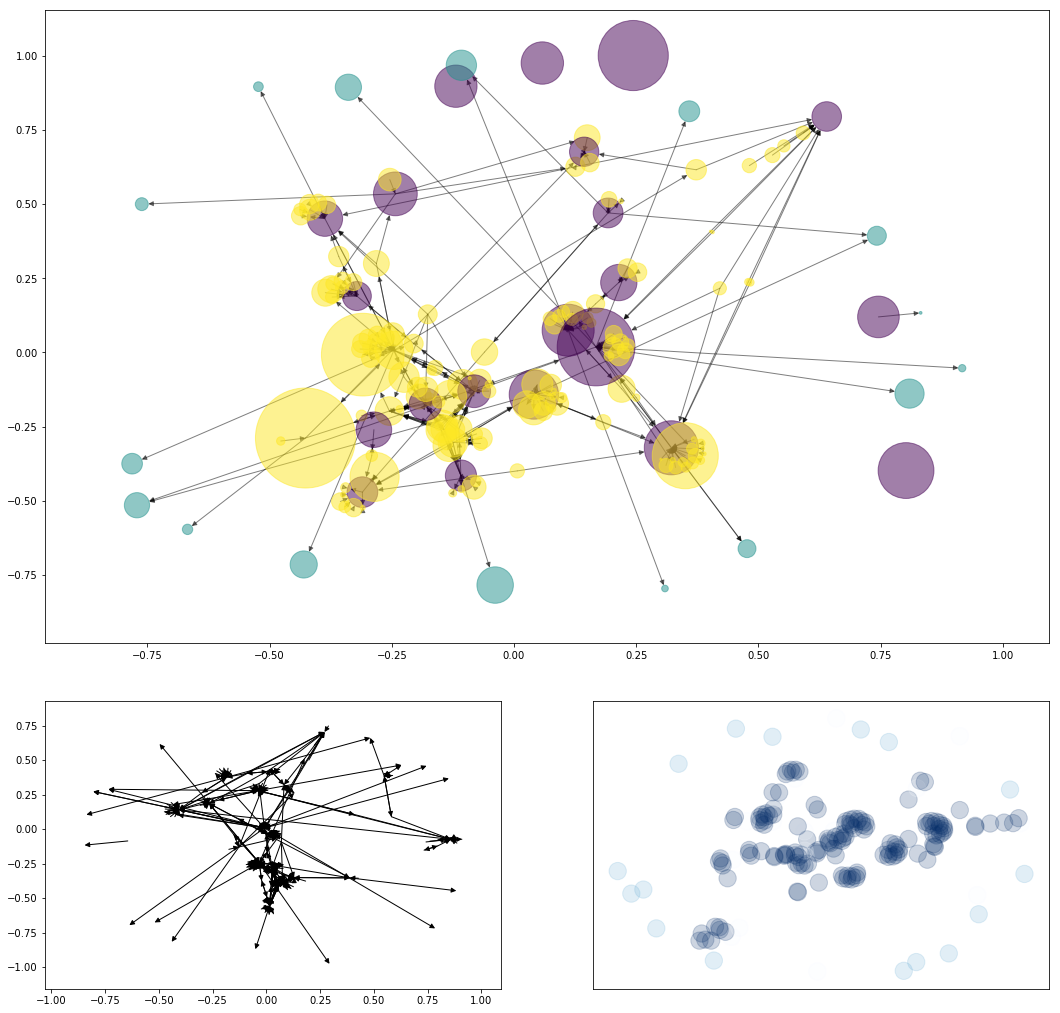

In [7]:
'''
Print report with information on graph, user centrality, and influence score.

From the graph density number of < 0.01 we can determine we have a low number of connections relative to the number of nodes. 
This suggests a loose connection between many smaller networks in the geographic area.

Looking at the centrality measurements for each user, we see they are fairly consistent with no single node serving as the connection between these smaller networks.

Comparing the centrality measurements with the influence scores we can which users are influential within Erie (high score & high centrality) and those 
who are influential on Twitter, but not within Erie(high score & low centrality).

In the directed graph below, users are represented by purple, friends by blue, and followers by yellow. Influence score is represented by the scale of circle.

Looking at the five users with the highest influence scores (largest purple nodes), 
we can see 2 are connected directly and also influential within Erie, but the other 3 share little connection to the rest of the network 
suggesting they are engaged with Twitter users outside Erie.

'''

PrintSummaryTwo(G)